<a href="https://colab.research.google.com/github/soupriyaaa/ml-lab-assignments/blob/main/02-KNN/exp_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
iris_df = pd.read_csv('/content/drive/MyDrive/datairis.csv')

In [ ]:
X = iris_df.drop('Species', axis=1).values
y = iris_df['Species'].astype('category').cat.codes.values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
results = {}
k_values = [3, 5, 7]

In [ ]:
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    score = knn.score(X_test, y_test)
    results[k] = score
    print(f"K={k}, Accuracy={score:.4f}")

K=3, Accuracy=1.0000
K=5, Accuracy=1.0000
K=7, Accuracy=1.0000


In [ ]:
best_k = max(results, key=results.get)
print("\nBest K:", best_k)


Best K: 3


In [ ]:
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train, y_train)
y_pred = best_knn.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

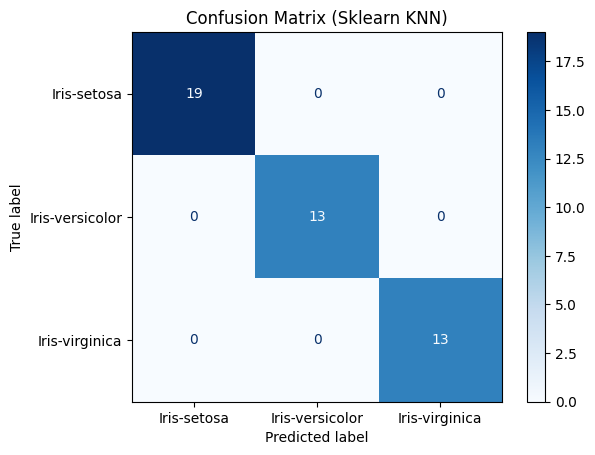

In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris_df['Species'].unique())
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix (Sklearn KNN)")
plt.show()


In [ ]:
print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=iris_df['Species'].unique()))

Classification Report:

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



In [ ]:
import numpy as np

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

class CustomKNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        return np.array([self._predict(x) for x in X])

    def _predict(self, x):
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        k_idx = np.argsort(distances)[:self.k]
        k_neighbor_labels = [self.y_train[i] for i in k_idx]
        most_common = np.bincount(k_neighbor_labels).argmax()
        return most_common

In [ ]:
custom_knn = CustomKNN(k=best_k)
custom_knn.fit(X_train, y_train)
y_pred_custom = custom_knn.predict(X_test)

In [ ]:
custom_acc = np.mean(y_pred_custom == y_test)
print(f"\nCustom KNN Accuracy (k={best_k}): {custom_acc:.4f}")



Custom KNN Accuracy (k=3): 1.0000


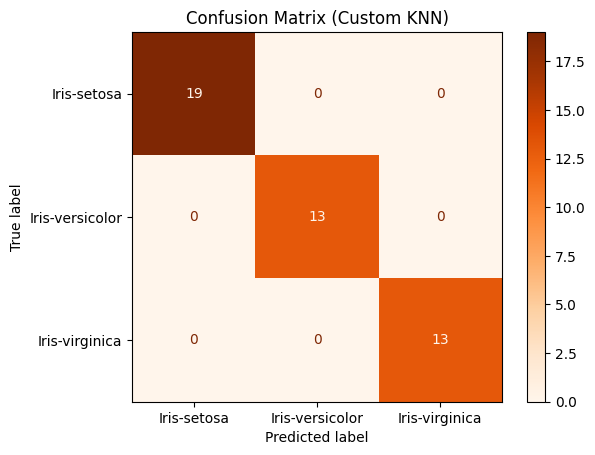

In [ ]:
cm_custom = confusion_matrix(y_test, y_pred_custom)
disp_custom = ConfusionMatrixDisplay(confusion_matrix=cm_custom, display_labels=iris_df['Species'].unique())
disp_custom.plot(cmap=plt.cm.Oranges)
plt.title("Confusion Matrix (Custom KNN)")
plt.show()


In [ ]:
print("Classification Report (Custom KNN):\n")
print(classification_report(y_test, y_pred_custom, target_names=iris_df['Species'].unique()))

Classification Report (Custom KNN):

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45

